# Binary Logistic Regression
## Building the model with scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("heart_failure.csv")

# list of columns in dataset with categorical data
cat_list=[
    "anaemia", 
    "diabetes",
    "high_blood_pressure",
    "sex",
    "smoking",
]
# creating a new instance
labelencoder=LabelEncoder()

# replacing cols with encoded categorical data
for cat in cat_list:
    df[cat]=labelencoder.fit_transform(df[cat])  

In [3]:
df.columns

,srno,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,149.000000,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,86.458082,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,0.000000,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,74.500000,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,149.000000,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,223.500000,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,298.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
feature_names=list(df.columns) # feature columns
feature_names.remove("DEATH_EVENT") #excluding the death event column
feature_names.remove("srno") # excluding the irrelevant srno column

# splitting the data
X=df[feature_names]
y=df["DEATH_EVENT"]

<class 'pandas.core.frame.DataFrame'>


## Model Development and Prediction
this will split the objects into random train-test subsets

**test_size set to .7(range 0.0-1.0)**

**train_size set to .3(implicit)**

In [59]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.90)
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

# Confusion Matrix
## evaluating the performance of the classification model

In [60]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
#here, diagonal values->accurate predictions
#       non-diagonal values->inaccurate predictions
#  adjust dataset ratio accordingly

array([[169,  13],
       [ 33,  55]])

## visualizing the confusion matrix with a heatmap instead

Text(33.0, 0.5, 'Actual')

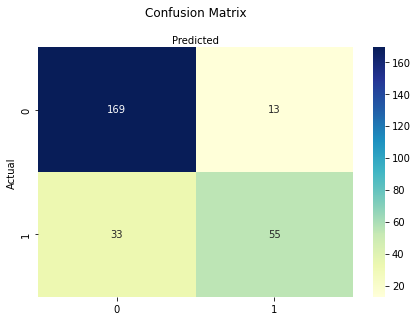

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1]
fig, ax=plt.subplots()
tickmarks=np.arange(len(class_names))

plt.xticks(tickmarks, class_names)
plt.yticks(tickmarks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## Evaluating performance

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8296296296296296
Precision: 0.8088235294117647
Recall: 0.625
